In [1]:
##### Always import all needed libraries in the first cell
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.svm import SVC
#from planar_utils import plot_decision_boundary, sigmoid
from Dataset import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import pandas as pd
from string import punctuation
import sqlite3
import os
import sys
np.random.seed(1) # this sets the seed so that the runs are consistent

%matplotlib inline

In [2]:
def char_count(string):
    count = 0
    for char in string:
        count +=1
    return count

In [3]:
notbanned = pd.read_csv("notbanned.csv", delimiter=',')

pd.set_option('display.max_columns', 5)  # Set to actually print out the full columns, change if needed
# print(notbanned.head(n=10))

banned = pd.read_csv("banned.csv", delimiter=',')

pd.set_option('display.max_columns', 5)  # Set to actually print out the full columns, change if needed
# print(banned.head(n=10))

banned_comments = []

for line in banned['body']:
    if "I am a bot" in str(line):
        #print("SKIPPING THIS LINE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        pass
    elif "r/" in str(line):
        pass
    elif '[deleted]' in str(line):
        pass
    else:
        for tempLine in str(line).split('\n'):
            banned_comments.append(str(tempLine))
#             if (char_count(str(tempStr)) < 30) and (char_count(str(tempStr)) != 0):
#                 if char_count(str(tempLine)) < 30:
#                     tempStr += tempLine
#                     pass
#                 else:
#                     banned_comments.append(str(tempLine))
#             else:
#                 banned_comments.append(str(tempStr))
#                 tempStr = ''
                
                
            

not_banned_comments = []

for line in notbanned['body']:
    if "I am a bot" in str(line):
        #print("SKIPPING THIS LINE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        pass
    elif "r/" in str(line):
        pass
    elif '[deleted]' in str(line):
        pass
    else:
        for tempLine in str(line).split('\n'):
            not_banned_comments.append(str(tempLine))

exclude = set(punctuation)  # Keep a set of "bad" characters.
# then make a string of all the words in Obama and Romney tweets without punctuation
banned_words_no_punct = " ".join(["".join(str(char) for char in text if char not in exclude) for text in banned_comments])
not_banned_words_no_punct = " ".join(["".join(str(char) for char in text if char not in exclude) for text in not_banned_comments])



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
Xcomments = []
ycomments = []

# for line in banned_comments:
#     Xcomments.append(str(line))
#     ycomments.append(1)
#     print(line)
# for line in not_banned_comments:
#     Xcomments.append(str(line))
#     ycomments.append(0)

count = 0
tempStr = ''
for line in banned_words_no_punct.split(' '):
    if count < 200:
        tempStr += (' ' + str(line))
        count += 1
    else:
        Xcomments.append(str(tempStr))
        ycomments.append(1)
#         print(tempStr)
        tempStr = str(line)
#         print(tempStr)
        count = 0

count = 0
tempStr = ''       
for line in not_banned_words_no_punct.split(' '):
    if count < 200:
        tempStr += (' ' + str(line))
        count += 1
    else:    
        Xcomments.append(str(tempStr))
        ycomments.append(0)
#         print(tempStr)
        tempStr = str(line)
#         print(tempStr)
        count = 0
vectorizer = TfidfVectorizer(min_df=0, lowercase=True)
X = vectorizer.fit_transform(Xcomments)
# print(vectorizer.get_feature_names())
# print(X.shape)

In [34]:
#vectorizer.transform(Xcomments).toarray()
#not_banned_vect.transform(not_banned_comments).toarray()


In [61]:
from sklearn.model_selection import train_test_split

comments_train, comments_test, y_train, y_test = train_test_split(Xcomments, ycomments, test_size=0.25, random_state=400, shuffle=True)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(comments_train)

X_train = vectorizer.transform(comments_train)
X_test  = vectorizer.transform(comments_test)
X_train

<5945x56667 sparse matrix of type '<class 'numpy.float64'>'
	with 778440 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", round(score, 6))

Accuracy: 0.904642


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from keras.models import Sequential
from keras import layers
from keras.layers import Reshape

input_dim = X_train.shape[1]  # Number of features
print(X_train.shape)
print(input_dim)

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_shape=(10,),activation='softmax'))
model.add(layers.Dense(1, input_shape=(5,), activation='relu'))

(5945, 56667)
56667


In [65]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                566680    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 566,801
Trainable params: 566,801
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 5945 samples, validate on 1982 samples
Epoch 1/20
5945/5945 [==============================] - 9s 2ms/step - loss: 0.5281 - accuracy: 0.7214 - val_loss: 0.2390 - val_accuracy: 0.9253
Epoch 2/20
5945/5945 [==============================] - 10s 2ms/step - loss: 0.0957 - accuracy: 0.9802 - val_loss: 0.1741 - val_accuracy: 0.9395
Epoch 3/20
5945/5945 [==============================] - 9s 2ms/step - loss: 0.0154 - accuracy: 0.9990 - val_loss: 0.1879 - val_accuracy: 0.9384
Epoch 4/20
5945/5945 [==============================] - 9s 2ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.1980 - val_accuracy: 0.9390
Epoch 5/20
5945/5945 [==============================] - 10s 2ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.1948 - val_accuracy: 0.9390
Epoch 6/20
5945/5945 [==============================] - 9s 2ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.1987 - val_accuracy: 0.9390
Epoch 7/20
5945/5945 [==============================] - 9s 2ms/step - loss: 0.0026 - a

In [67]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7765
Testing Accuracy:  0.7619


In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

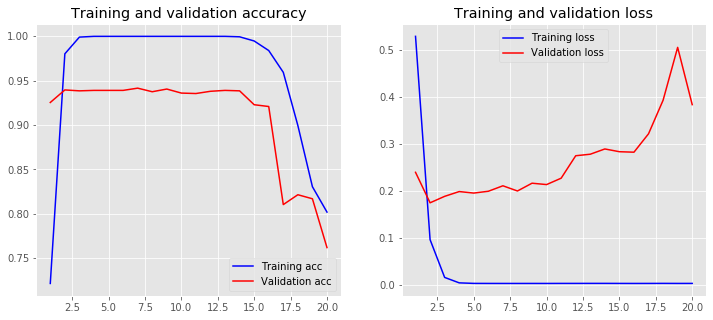

In [69]:
plot_history(history)

In [3]:
## Can probs ignore from here down

banned_dict = {}

for word in banned_words_no_punct.split(" "):
    if word in banned_dict:
        banned_dict[word] += 1
    else:
        banned_dict[word] = 1
        
print(dict(list(banned_dict.items())[0: 5]))

{'I': 15150, 'know': 1730, 'that': 9064, 'strenuous': 4, 'ever': 492}


In [4]:
not_banned_dict = {}

for word in not_banned_words_no_punct.split(" "):
    if word in not_banned_dict:
        not_banned_dict[word] += 1
    else:
        not_banned_dict[word] = 1
        
print(dict(list(not_banned_dict.items())[0: 5]))

{'Seriously': 52, 'The': 2331, 'pats': 6, 'havent': 245, 'won': 77}


In [5]:
banned_counts = {}
for word in list(banned_dict.keys()):
    if word in not_banned_dict:
        banned_counts[word] = banned_dict[word] - not_banned_dict[word]
        if banned_counts[word] < 0:
            banned_counts[word] = 0
    else:
        banned_counts[word] = banned_dict[word]

print(dict(list(banned_counts.items())[0: 5]))

{'I': 0, 'know': 39, 'that': 0, 'strenuous': 4, 'ever': 1}


In [6]:
not_banned_counts = {}
for word in list(not_banned_dict.keys()):
    if word in banned_dict:
        not_banned_counts[word] = not_banned_dict[word] - banned_dict[word]
        if not_banned_counts[word] < 0:
            not_banned_counts[word] = 0
    else:
        not_banned_counts[word] = not_banned_dict[word]
        
print(dict(list(not_banned_counts.items())[0: 5]))

{'Seriously': 0, 'The': 733, 'pats': 6, 'havent': 37, 'won': 66}


In [7]:
def getCounts(str):
    """
    get how many times the words show up in the banned dictionary - how many times it shows up in the not banned dictionary
    """
    weight = 0
    for word in str.split(" "):
        if word in banned_counts:
            weight += banned_counts[word]
        if word in not_banned_counts:
            weight -= not_banned_counts[word]
    return weight

In [8]:
def getBannedCount(str):
    """
    get how many times the words show up in the banned dictionary 
    """
    weight = 0
    for word in str.split(" "):
        if word in banned_counts:
            weight += banned_counts[word]
    return weight

In [9]:
def getNotBannedCount(str):
    """
    get how many times the words show up in the not banned dictionary 
    """
    weight = 0
    for word in str.split(" "):
        if word in not_banned_counts:
            weight += not_banned_counts[word]
    return weight

In [10]:
feature = []
#labels = np.array(int)
labels = []
feature1 = []
feature2 = []
feature3 = []
count = 0
for comment in banned_comments:
    if count < 10000:
        feature1.append(float(getBannedCount(comment)))
        feature2.append(float(getNotBannedCount(comment)))
        feature3.append(float(getCounts(comment)))
        labels.append(float(1))
        count += 1
    else:
        break
        #labels = np.append(labels, 1)
        
count = 0
for comment in not_banned_comments:
    if count < 10000:
        feature1.append(float(getBannedCount(comment)))
        feature2.append(float(getNotBannedCount(comment)))
        feature3.append(float(getCounts(comment)))
        labels.append(float(0))
        #labels = np.append(labels, 0)
        count += 1
    else:
        break

feature.append(feature1)
feature.append(feature2)
feature.append(feature3)
labels1 = []
labels1.append(labels)
print('done')

done


In [11]:
features = np.array([np.array(xi) for xi in feature])
type(features)

numpy.ndarray

In [12]:
label = np.array([np.array(xi) for xi in labels1])
type(label)

numpy.ndarray

In [13]:
shape_X = features.shape
shape_Y = label.shape
m = 2 * 400

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have %d training sample!' % (m))

The shape of X is: (3, 20000)
The shape of Y is: (1, 20000)
I have 800 training sample!


In [14]:
def layerSizes(X, Y):
    """
    X -- input dataset of shape 
    Y -- labels of shape
    """
    input_layer_size= X.shape[0]
    hidden_layer_size= 4
    output_layer_size= Y.shape[0]
    # hardcode as 1 bc we have to 
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return (input_layer_size, hidden_layer_size, output_layer_size)

In [16]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    
    
    """
    
    np.random.seed(2)  # you can pick any seed in this case
    
    Weight1 = np.random.randn(hidden_size,input_size) * 0.01
    Weight2 = np.random.randn(output_size,hidden_size) * 0.01
    bias1 = np.zeros(shape=(hidden_size, 1))
    bias2 = np.zeros(shape=(output_size, 1))
    
    parameters = {"Weight1": Weight1,
                  "bias1": bias1,
                  "Weight2": Weight2,
                  "bias2": bias2}
    
    
    """
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape 
                    b1 -- bias vector of shape 
                    W2 -- weight matrix of shape 
                    b2 -- bias vector of shape
    
    """
    
    return parameters

In [18]:
def forward_prop(X, parameters):
    """
    X -- input data of size
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    
    """
    # Retrieve each parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1']
    bias1 = parameters['bias1']
    Weight2 = parameters['Weight2']
    bias2 = parameters['bias2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(Weight1,X) + bias1
    A1 = np.tanh(Z1)
    Z2 = np.dot(Weight2,A1) + bias2
    A2 = sigmoid(Z2)
    
    #Values needed in the backpropagation are stored in cache. Later, it will be given to back propagation.
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    return A2, cache

In [20]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    """
    
    m = Y.shape[1]  # number of example 

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y[0]) + np.multiply((1 - Y[0]), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    ### Remember that, if you want to use different cross-entropy loss, you need to change logprobs and cost accordingly
    
    cost = float(np.squeeze(cost))   
    
    return cost

In [21]:
def backward_propagation(parameters, cache, X, Y):
    """
    
    parameters -- dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data 
    Y -- "true" labels vector 
    
    
    """
    m = X.shape[1]
    
    # Copy W1 and W2 from the dictionary "parameters"
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
        
    # Copy A1 and A2 from dictionary "cache".
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    #  calculate dW1, db1, dW2, db2. 
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(Weight2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    gradient = {"dW1": dW1,
                "db1": db1,
                "dW2": dW2,
                "db2": db2}
    
    return gradient

In [22]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    """
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    """
    # Copy the following parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    bias1 = parameters['bias1']
    bias2 = parameters['bias2']
    
    # Copy each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    Weight1 = Weight1 - learning_rate * dW1
    Weight2 = Weight2 - learning_rate * dW2
    bias1 = bias1 - learning_rate * db1
    bias2 = bias2 - learning_rate * db2
    
    parameters = {"Weight1": Weight1,
                  "Weight2": Weight2,
                  "bias1": bias1,
                  "bias2": bias2}
    
    """
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    #print(parameters)
    return parameters

In [28]:
def model(X, Y, n_h, num_iterations = 1000, print_cost=True):
    """
    X -- dataset
    Y -- labels
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent
    print_cost -- if True, print the cost in every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(4)
    n_x = layerSizes(X, Y)[0]
    n_y = layerSizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    Weight1 = parameters['Weight1']
    bias1 = parameters['bias1']
    Weight2 = parameters['Weight2']
    bias2 = parameters['bias2']
    
    # gradient descent

    for i in range(0, num_iterations):
         
        # Call the Forward propagation with X, and parameters.
        A2, cache = forward_prop(X, parameters)
        
        # Call the Cost function with A2, Y and parameters.
        cost = compute_cost(A2, Y, parameters)
 
        # Call Backpropagation with Inputs, parameters, cache, X and Y.
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Update gradient descent parameter with  parameters and grads and learning rate.
        parameters = update_parameters(parameters, grads)
        
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [29]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    parameters -- python dictionary containing your parameters 
    X -- input data
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_prop(X,parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [31]:
# Build a model with a n_h-dimensional hidden layer
parameters = model(features, label, n_h = 1, num_iterations = 1000, print_cost=True)

# Plot the decision boundary
# plot_decision_boundary(lambda x: predict(parameters, x.T), features, label[0])
# plt.title("Decision Boundary for hidden layer size " + str(4));

# Print accuracy
predictions = predict(parameters, features)
print ('Accuracy: %d' % float((np.dot(label,predictions.T) + np.dot(1-label,1-predictions.T))/float(label.size)*100) + '%')

Cost after iteration 0: 0.693369
Cost after iteration 100: 0.691049
Cost after iteration 200: 0.690562
Cost after iteration 300: 0.690457
Cost after iteration 400: 0.690391
Cost after iteration 500: 0.690337
Cost after iteration 600: 0.690291
Cost after iteration 700: 0.690251
Cost after iteration 800: 0.690216
Cost after iteration 900: 0.690187
Accuracy: 51%
